<a href="https://colab.research.google.com/github/tabaraei/Kernelized-Linear-Classification/blob/main/Kernelized_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data Loading and Exploration

Throughout this first section, our main focus is to:
1. Effectively load the data, and store it in a `Pandas` DataFrame for further processing
2. Explore the distribution of target labels and the features, to define a proper strategy to be followed accordingly in the preprocessing step

## 1-1- Loading the Dataset and Libraries

Directly from the dataset link provided in the Google Drive, we attempt to load the data as below:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product

sns.set_style('darkgrid')

In [2]:
dataset_url = 'https://drive.google.com/uc?export=download&id=1HeP6uwyG3oMcJnViG4yCMmzmSeTa1mko'
dataset = pd.read_csv(dataset_url)
dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.481134,-0.572225,99.274788,-0.868047,-0.663229,0.572447,5.163238,1.765743,0.720265,-54.952233,-1
9996,0.047373,0.990198,100.444834,-0.707179,0.912113,-0.510397,1.128577,0.116130,-2.559018,-56.008656,-1
9997,1.741933,0.036304,100.524071,-0.113742,-0.761337,-0.728295,-1.334732,-1.312760,-0.442573,-56.170876,-1
9998,2.574986,0.041442,98.983735,-1.937883,0.983004,0.798133,5.847342,0.904038,-1.695064,-54.820699,1


Analyzing the status of the dataset below, it is clear that:

- The target labels `y` are binary, taking values from the set {-1, 1}. These labels are of data type int64, which aligns well with our classification objectives.
- The feature vector `X` consists exclusively of numerical values, eliminating the need for converting categorical features to numerical ones. All features are of data type float64, so no data type conversion is necessary.

Overall, our dataset contains 10 features $x_1, ..., x_{10}$, and 10000 data samples across the rows. No missing values can be observed at the first glance, since all the features contain 10000 samples as well.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
 4   x5      10000 non-null  float64
 5   x6      10000 non-null  float64
 6   x7      10000 non-null  float64
 7   x8      10000 non-null  float64
 8   x9      10000 non-null  float64
 9   x10     10000 non-null  float64
 10  y       10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


## 1-2- Data Distribution Exploration

Analyzing the distribution of target labels `y` as below, it is clear that the dataset is almost perfectly *balanced*, with roughly same number of positive and negative classes distributed among the samples of the dataset.

In [4]:
dataset['y'].value_counts().to_frame()

,count
y,
-1,5008
1,4992


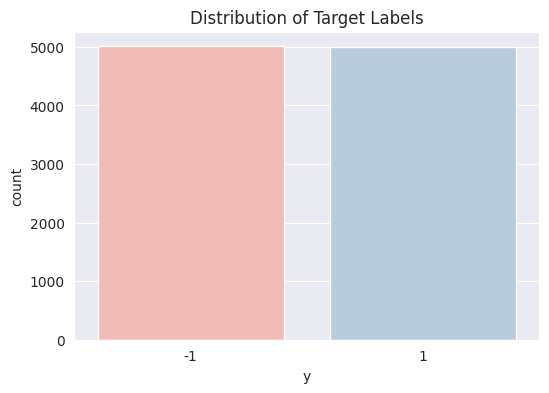

In [5]:
plt.figure(figsize=(6, 4))
plt.title("Distribution of Target Labels")
_ = sns.countplot(data=dataset, x='y', hue='y', palette='Pastel1', legend=False)

Analyzing the distribution of features $x_i \in X$ as below, it can be seen that the range of values each feature takes is different than the other. Therefore, we should adopt proper scaling methods in our preprocessing step to avoid our prediction being more affected toward features with higher range of values.

In [6]:
dataset.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.591298,0.515879,99.848936,-1.504139,0.077645,0.051823,0.975207,0.635194,0.051926,-55.447678,-0.001600
std,1.321185,2.054488,0.710948,1.133605,0.707270,0.704755,2.162237,2.212708,1.769646,0.710082,1.000049
min,0.002443,-7.524934,98.572455,-7.078939,-1.000000,-1.000000,-6.906971,-7.140755,-7.151890,-56.773931,-1.000000
25%,0.524758,-0.883862,99.159314,-2.179713,-0.624710,-0.644261,-0.500506,-0.879985,-1.129665,-56.137679,-1.000000
50%,1.276243,0.492813,99.802830,-1.262985,0.157145,0.101648,1.006918,0.624762,0.024726,-55.397208,-1.000000
75%,2.352106,1.902003,100.549141,-0.605316,0.777856,0.754770,2.434886,2.098389,1.248961,-54.758351,1.000000
max,9.384223,8.302375,101.260768,-0.000003,1.000000,1.000000,8.760306,9.287266,6.211452,-54.208890,1.000000


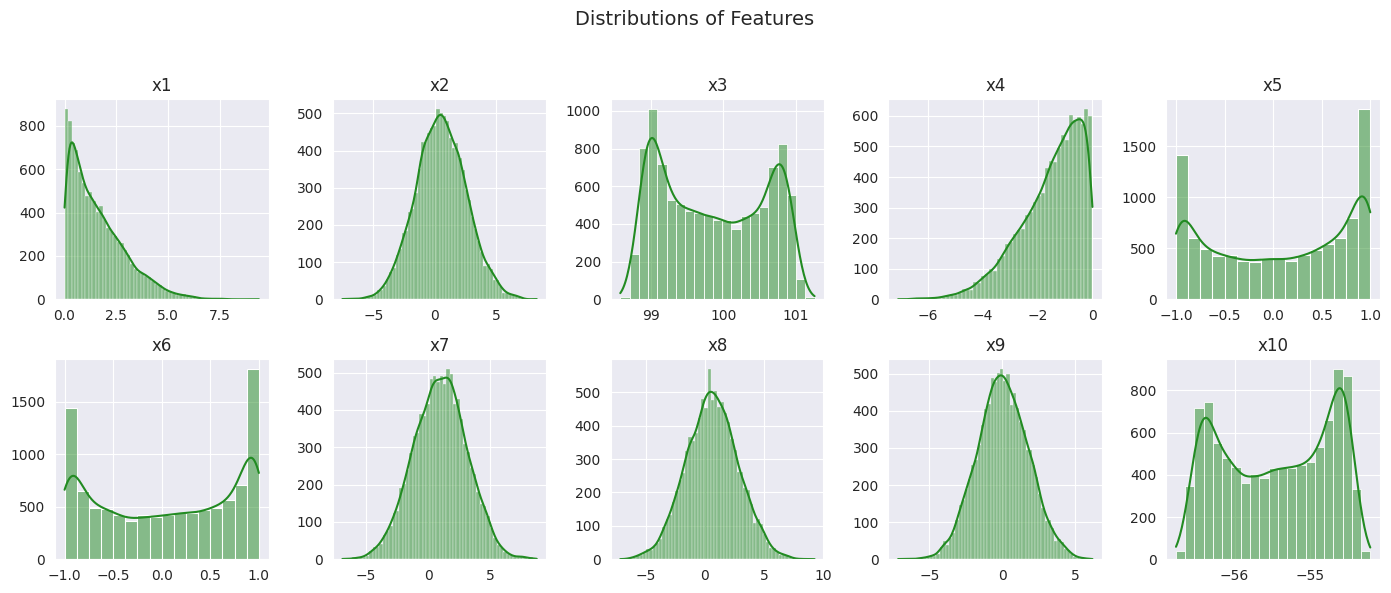

In [7]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
fig.suptitle('Distributions of Features', fontsize=14)

# Plot each feature's distribution
for i, feature in enumerate(dataset.drop(columns=['y']).columns):
    row = i // 5
    col = i % 5
    sns.histplot(dataset[feature], kde=True, ax=axes[row, col], color='forestgreen')
    axes[row, col].set_title(feature)
    axes[row, col].set(xlabel=None, ylabel=None)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

Additionally, we can analyze the potential existence of noise and outliers. While there several techniques to detect outliers like *z-score*, we first take a look at the corresponding *boxplot* of each feature, and then use the *IQR (Inter Quartile Range)* approach to determine the outlier boundaries and remove them, since it is the most commonly used and most reliable approach in the research field.

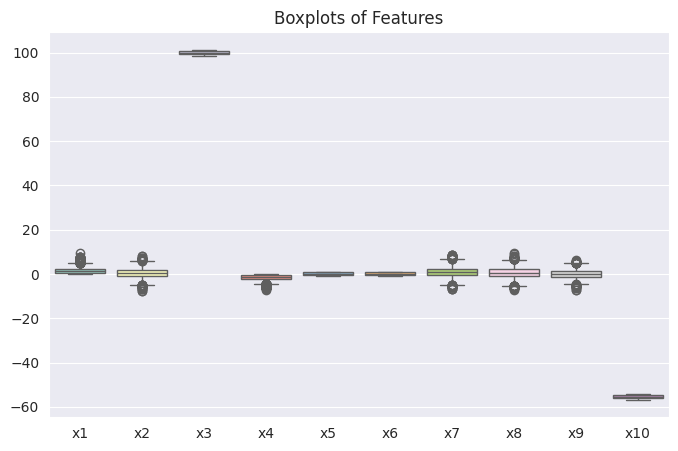

In [8]:
plt.figure(figsize=(8, 5))
plt.title("Boxplots of Features")
_ = sns.boxplot(data=dataset.drop(columns=['y']), palette='Set3', showfliers=True)

In [9]:
# Compute Q1 and Q3 percentiles, and the corresponding IQR
Q1 = dataset.drop(columns=['y']).quantile(0.25)
Q3 = dataset.drop(columns=['y']).quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Detecting the outliers, and removing them from dataset
outliers = (dataset.drop(columns=['y']) < lower) | (dataset.drop(columns=['y']) > upper)
dataset = dataset[~outliers.any(axis=1)].copy()
dataset.shape

(9456, 11)

Looking at the boxplot of the features again, it is clear that the majority of outliers have been polished using the IQR technique, and we can continue to the next step.

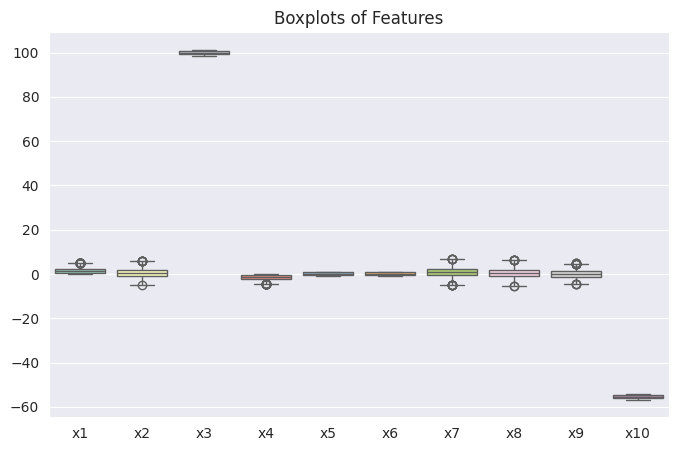

In [10]:
plt.figure(figsize=(8, 5))
plt.title("Boxplots of Features")
_ = sns.boxplot(data=dataset.drop(columns=['y']), palette='Set3', showfliers=True)

While the IQR technique removes extreme outliers, it may not remove all data points that are distant from the rest of the data. Some points that are still far from the bulk of the data but within the defined range, can appear as mild outliers in the boxplot.

# 2- Data Preprocessing

In this section, our primary goal is to preprocess the data effectively to ensure it is ready for machine learning algorithms and free from errors. By the end of this exploration and analysis, the dataset should be clean and well-prepared for model training. We will address the following key criteria:

1. **Presence of Missing Values:** We will check the dataset for any missing values. Null values can complicate numerical computations and degrade model performance. To address this, we will either impute missing values or remove the affected rows/columns to maintain data integrity.

2. **Check for Duplicates:** Duplicate samples with identical characteristics can skew the results and reduce model performance. We will identify and remove any duplicate entries to ensure each sample in the dataset is unique.

3. **Feature Selection:** Selecting the most informative features is undeniably one of the most important tasks before feeding the data into machine learning models. In this particular dataset, since we do not have prior knowledge about the information provided by features, we will only rely on identification of correlation among features, to filter our highly correlated features.

4. **Feature Normalization:** In the data exploration step, we discovered that the features in our dataset vary in range, which can negatively impact the performance of certain algorithms such as SVM. Therefore, we need to adopt normalization techniques to prevent the side effects, ensuring they contribute equally to the model's learning process.

5. **Partitioning the Dataset:** To prevent data leakage and ensure a fair evaluation of our models, we will split the dataset into training and test sets. This separation ensures that the test set remains unseen during training, providing an unbiased assessment of model performance and ensuring that we follow a sound methodology.

## 2-1- Presence of Missing Values

In order to analyze the existence of Null values, we will count the occurrences of such values using `isnull` function in each column, reporting the result as below.

In [11]:
dataset.isnull().sum().to_frame(name='Sum of Null Values').T

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
Sum of Null Values,0,0,0,0,0,0,0,0,0,0,0


As we mentioned earlier in the previous section, there is no Null values present in our dataset, hence no further consideration is required in this regard.

## 2-2- Check for Duplicates

Using the `duplicated` function provided by Pandas, we can count the duplicated rows as below:

In [12]:
dataset.duplicated().sum()

0

Since there are no duplicated rows present in our dataset, no actions are expected in this manner.

## 2-3- Feature Selection

It is evident that many of the machine learning applications rely on the fact the features are **independent** from each other, hence they are not correlated with one another. Highly correlated features can sometimes provide redundant information, where we might consider dimensionality reduction techniques or feature selection methods in such cases.

The identification of the correlation among features is an important task, which can be achieved by using the *correlation matrix* to assess the correlation among different features and identify potentially irrelevant information. A correlation matrix provides the correlation coefficients between pairs of features, which helps to understand the relationships between them. After computing this matrix, we attempt to visualize it using a *heatmap* to better analyze the situation.

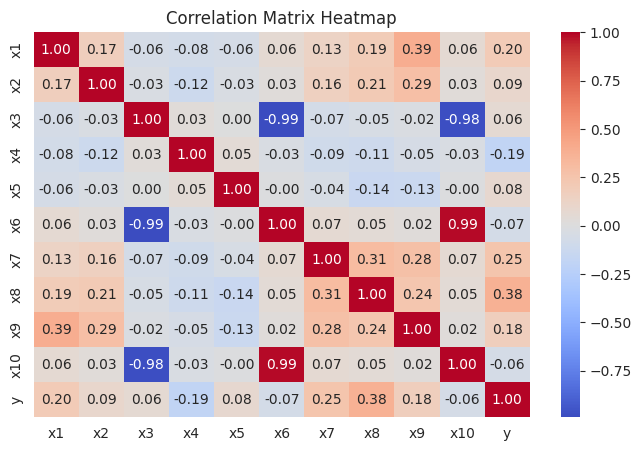

In [13]:
plt.figure(figsize=(8, 5))
plt.title("Correlation Matrix Heatmap")
_ = sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Interpreting the correlation matrix:
- The "red" cells with values close to 1 denote perfect positive correlation
- The "blue" cells with values close to -1 denote perfect negative correlation
- The "light" cells with values close to 0 denote no correlation among those features

Analyzing the correlations, it can be seen that the features $x_6$ and $x_{10}$ are positively correlated together (with value 0.99), while being negatively correlated with $x_3$ (with values -0.99 and -0.98). Additionally, analyzing their correlation with respect to the label `y`, it can be seen that all of them are almost with the same value close to 0.06, providing no extra information with respect to the other for the classification.

After identifying highly correlated features, since we have a few number of features available, we will proceed with manually removing redundant features which are highly correlated. To this regard, we remove the features $x_3$ and $x_{10}$, preservng the feature $x_6$ in our dataset.

In [14]:
dataset.drop(columns=['x3', 'x10'], inplace=True)
dataset.head(3)

,x1,x2,x4,x5,x6,x7,x8,x9,y
0,1.205492,5.823226,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-1
2,1.692571,-0.887019,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-1
3,4.289320,1.416843,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,1


## 2-4- Feature Normalization

The two most common techniques for normalization are:
- **Min-Max Scaling**, which scales the data to a fixed range (usually 0 to 1)
- **Z-score Normalization**, which standardizes the features to have a mean of 0 and a standard deviation of 1.

Since the *Z-score Normalization* is more consistent with respect to gaussian assumptions, and it is more reliable when dealing with algorithms that assume normal distribution centered around zero, it naturally fits better our problem, and we will proceed with this technique. It can be computed as:

$$Z = \frac{X-\mu}{\sigma}$$

In [15]:
def z_score_normalization(df):
    for column in df.columns:
        if column != 'y':
            df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

dataset = z_score_normalization(dataset.copy())
dataset.drop(columns=['y']).describe().loc[['mean', 'std']]

,x1,x2,x4,x5,x6,x7,x8,x9
mean,1.649367e-16,-3.869813e-17,-1.544168e-16,3.757100e-19,-3.757100e-18,-5.447795e-17,2.780254e-17,2.780254e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 2-5- Partitioning the Dataset

To maintain the integrity of our data and prevent data leakage, one approach is to partition the dataset into training and test sets, such that the model is trained on the training set and its performance is evaluated on the test set. This partitioning can be achieved as follows:

1. **Shuffle the Data:** The dataset is shuffled to randomize the order of the samples, ensuring a more representative distribution and reducing the likelihood of biased results due to any inherent order in the data.

2. **Split the Data:** The shuffled data is partitioned such that the first 80% of the samples are allocated to the training set, while the remaining 20% are reserved for the test set.

3. **Separate Features and Labels:** The target labels are separated from the feature variables, being stored in variables `X` (features) and `y` (labels) for both training and test sets.

This procedure ensures that the training and test sets are appropriately isolated, preserving the validity of our model evaluation.

```python
>> # Shuffle the Data
>> dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

>> # Split the Data
>> split_index = int(len(dataset) * 0.8)
>> train_data, test_data = dataset[:split_index], dataset[split_index:]

>> # Separate Features and Labels
>> X_train, y_train = train_data.drop(columns='y').to_numpy(), train_data['y'].to_numpy()
>> X_test, y_test = test_data.drop(columns='y').to_numpy(), test_data['y'].to_numpy()
>> print(f'Dimensions of Training Data: Features {X_train.shape}, Labels {y_train.shape}')
>> print(f'Dimensions of Test Data: Features {X_test.shape}, Labels {y_test.shape}')

Dimensions of Training Data: Features (7564, 8), Labels (7564,)
Dimensions of Test Data: Features (1892, 8), Labels (1892,)
```

Where a model could be trained and evaluated as:

```python
>> model = Model(**params)
>> model.train(X_train, y_train)
>> y_pred = model.predict(X_test)
>> compute_metrics(y_test, y_pred)
```

However, since we aim to perform hyperparameter optimization alongside our model implementation, we use the *K-Fold Nested Cross-Validation* technique instead, which is fully discussed in the next section.

# 3- Hyperparameter Tuning and Model Evaluation

A common characteristic of many algorithms is that they include a set of hyperparameters that are not determined by the algorithm itself, but rather chosen by a human. These hyperparameters define a class of predictors, which can be represented as $\{A_\theta: \theta \in \Theta\}$.

For a fixed given hyperparameter $\theta$, we can use the *K-Fold Cross-Validation* technique to estimate $\mathbb{E}[\ell_{D}(A_\theta(S))]$ as follows:
- Let $S$ be the entire dataset of size $m$, where we partition it into $K$ subsets (folds) $S_1, \dots, S_K$ of size $m/K$ each. $S_i$ denotes the testing part while $S_{-i} \equiv S\ \backslash\  S_i$ denotes the training part for the $i$-th fold and $i = 1, \dots, K$.

- In order to estimate the $\mathbb{E}[\ell_{D}(A_\theta(S))]$, we first run $A$ on each **training part** $S_{-i}$ of the folds $i = 1, \dots, K$ and obtain the predictors $h_i = A(S_{-i}) \dots, h_K = A(S_{-K})$. Then, We take an average error on the **testing part** of each fold:
$$
\ell_{S_{i}}(h_i) = \frac{K}{m} \sum_{(\boldsymbol{x},y) \in S_{i}} \ell(y, h_i(\boldsymbol{x}))
$$

- Finally, we compute the K-fold CV estimate denoted by $\ell_{S}^{CV}(A)$ by averaging these errors:
$$
\ell_{S}^{CV}(A) = \frac{1}{K} \sum\limits_{i=1}^{K} \ell_{S_{i}}(h_i)
$$

Tuning the hyperparameters can be achieved by:
1. Tuning hyperparameters on a given training set, aiming to achieve the smallest risk. In practice we aim to find $\theta^* \in \Theta$ such that $\ell_{D}(A_{\theta^*}(S)) = \min_{\theta \in \Theta_0} \ell_{D}(A_\theta(S))$. After splitting the training set into $S_{\text{train}}$ and $S_{\text{dev}}$, the algorithm is run on $S_{\text{train}}$ once for each of the hyperparameters in $\Theta_0$, and the resulting predictors are tested on the development set $S_{\text{dev}}$. Choosing the hyperparameters with smallest error on the validation set, we obtain the final predictor by retraining the learning algorithm on the original training set before splitting.

2. Tuning hyperparameters via *K-Fold Nested Cross-Validation*, aiming to estimate the performance of $A_\theta$ on a typical training set of a given size when $\theta$ is tuned on the training set, which is computed by averaging the performance of predictors obtained with potentially different values of their hyperparameters, according to the following pseudo-code:

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{K-fold Nested Cross-Validation} \\
\textbf{Input:} & \text{Dataset } S \\
1. & \text{Split } S \text{ into folds } S_1, \ldots, S_K \\
2. & \textbf{for } i = 1, \ldots, K \textbf{ do} \\
3. & \quad\quad \text{Compute training part of } i\text{-th fold: } S_{-i} \equiv S \setminus S_i \\
4. & \quad\quad \text{Run CV on } S_{-i} \text{ for each } \theta \in \Theta_0 \text{ and find } \theta_i = \underset{\theta \in \Theta_0}{\arg\min} \, \ell^{\text{cv}}_{S_{-i}}(A_\theta) \\
5. & \quad\quad \text{Re-train } A_{\theta_i} \text{ on } S_{-i}: \, h_i = A_{\theta_i}(S_{-i}) \\
6. & \quad\quad \text{Compute error of } i\text{-th fold: } \varepsilon_i = \ell_{S_i}(h_i) \\
7. & \textbf{end} \\
\textbf{Output: } & (\varepsilon_1 + \cdots + \varepsilon_K)/{K}
\end{array}
$$

In [16]:
class NestedCV:
    def __init__(self, dataset, model, param_grid, outer_K=5, inner_K=4):
        self.X, self.y = dataset.drop(columns='y').to_numpy(), dataset['y'].to_numpy()
        self.n_samples, self.n_features = self.X.shape
        self.model = model
        self.param_grid = [dict(zip(keys, p)) for keys, values in [zip(*param_grid.items())] for p in product(*values)]
        self.outer_K = outer_K
        self.inner_K = inner_K

    def _zero_one_loss(self, y_true, y_pred):
        return np.sum(y_true != y_pred)

    def _compute_metrics(self, y_true, y_pred):
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == -1) & (y_pred == -1))
        FP = np.sum((y_true == -1) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == -1))

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        return accuracy, precision, recall

    def _KFold(self, K, n_samples, indices=None):
        if indices is None: indices = np.arange(n_samples)
        np.random.shuffle(indices)
        split_points = np.linspace(start=0, stop=n_samples, num=K+1, dtype=int)
        test_indices = [indices[split_points[i]:split_points[i+1]] for i in range(K)]
        train_indices = [np.setdiff1d(indices, test_idx) for test_idx in test_indices]
        return zip(train_indices, test_indices)

    def train(self):
        # Outer CV, evaluating the best hyperparameter combination according to the test set
        self.training_results, self.test_results = list(), list()
        for fold, (outer_train_indices, test_indices) in enumerate(self._KFold(K=self.outer_K, n_samples=self.n_samples)):

            # Inner CV, finding the best hyperparameter combination according to the validation set
            print(f'Fold {fold+1}')
            min_loss = np.inf
            best_params = None
            for params in self.param_grid:
                print(f'Hyperparameter combination: {params}')
                losses = list()
                for train_indices, validation_indices in self._KFold(K=self.inner_K, n_samples=len(outer_train_indices), indices=outer_train_indices):
                    model = self.model(**params)
                    model.train(self.X[train_indices], self.y[train_indices])
                    y_pred = model.predict(self.X[validation_indices])
                    loss = self._zero_one_loss(self.y[validation_indices], y_pred)
                    losses.append(loss)

                if np.mean(losses) < min_loss:
                    min_loss = np.mean(losses)
                    best_params = params

            print(f'Retraining the model with the best hyperparameter combination: {best_params}')
            model = self.model(**best_params)
            model.train(self.X[outer_train_indices], self.y[outer_train_indices])

            # Training error
            y_pred_train = model.predict(self.X[outer_train_indices])
            accuracy, precision, recall = self._compute_metrics(self.y[outer_train_indices], y_pred_train)
            self.training_results.append([accuracy, precision, recall])
            print(f'Training Set Evaluation: Accuracy {accuracy:.2%}, Precision {precision:.2%}, Recall {recall:.2%}')

            # Test error
            y_pred_test = model.predict(self.X[test_indices])
            accuracy, precision, recall = self._compute_metrics(self.y[test_indices], y_pred_test)
            self.test_results.append([accuracy, precision, recall])
            print(f'Test Set Evaluation: Accuracy {accuracy:.2%}, Precision {precision:.2%}, Recall {recall:.2%}')
            print('-'*80)

        # Average results
        accuracy, precision, recall = np.mean(self.training_results, axis=0)
        print(f'Average Training Results: Accuracy {accuracy:.2%}, Precision {precision:.2%}, Recall {recall:.2%}')
        accuracy, precision, recall = np.mean(self.test_results, axis=0)
        print(f'Average Test Results: Accuracy {accuracy:.2%}, Precision {precision:.2%}, Recall {recall:.2%}')

The `NestedCV` class is designed to take in a `dataset`, `model`, `param_grid`, `outer_K`, and `inner_K` as inputs. It performs nested cross-validation for the specified model across various hyperparameter combinations defined in the parameter grid. The class optimizes hyperparameters using the validation set, trains the model on the training set, and evaluates performance on the test set. This approach ensures a robust and sound evaluation process, avoiding data leakage. We will utilize this module in the following sections as we train and evaluate different models.

# 4- Model Implementation

In this section, we will implement the following machine learning algorithms:

1. The Perceptron algorithm
2. Support Vector Machines (SVMs) using the Pegasos algorithm
3. Regularized logistic classification (i.e., the Pegasos objective function with logistic loss instead of hinge loss)

In addition, we will attempt to evaluate these models with proper hyperparameter optimization, reporting the training and test errors.

## 4-1- Perceptron

We know that a linear predictor for $\mathcal{X} \in \mathbb{R}^d$ is a function $h: \mathbb{R}^d \rightarrow \mathbb{R}$ defined as $h(x) = f(w^Tx)$ for some $w \in \mathbb{R}^d$, where $f: \mathbb{R} \rightarrow \mathbb{R}$ is often referred to as an *activation function*. In linear classification tasks, we typically use $h(x) = \text{sgn}(w^Tx)$, where:

$$
\text{sgn}(z) = \begin{cases}
                    1 & \text{if } z > 0 \\
                    -1 & \text{otherwise}
                \end{cases}
$$

In this case, the *zero-one* loss $\mathbb{I}\{h(x_t) \neq y_t\}$ can be written as $\mathbb{I}\{y_t w^T x_t \leq 0 \}$. It should be noted that finding an efficient implementation of Empirical Risk Minimization (ERM) for linear classifiers using zero-one loss is unlikely, and the decision problem of finding $h_S$ is NP-complete, even in case of binary features.

However, in the linearly separable case, there exists at least a solution which can be found in polynomial time to solve the ERM problem, for which we can use the **Perceptron** algorithm for linear classifiers.

The Perceptron algorithm is a linear binary classifier which iteratively adjusts its weights based on the input features and the misclassified predictions, trying to find a homogeneous separating hyperplane which always terminates on linearly separable cases. It can also be seen as a single unit of an artificial neural network, where in the single layer case it's only capable of learning linearly separable patterns.

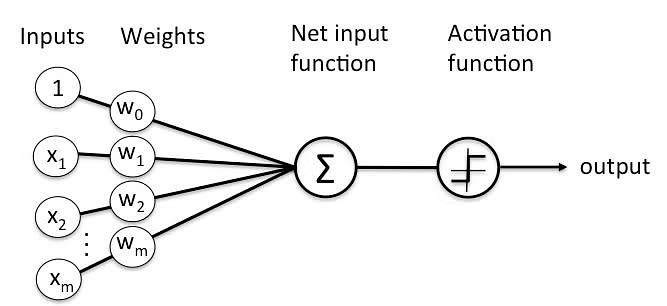

We will now implement the Perceptron, according to the following pseudo-code:

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Perceptron} \\
\textbf{Input:} & \text{Training set } (x_1, y_1), \dots, (x_m, y_m) \in \mathbb{R}^d \times \{-1, 1\} \\
1. & \textbf{Set } w_1=(0,\dots,0) \\
2. & \textbf{while } True \textbf{ do} \\
3. & \quad\quad \textbf{for } t = 1,\dots,m \textbf{ do} \\
4. & \quad\quad \quad\quad \textbf{if } y_t w^T x_t \leq 0 \textbf{ then} \\
5. & \quad\quad \quad\quad\quad\quad w \leftarrow w + y_t x_t \\
6. & \quad\quad \quad\quad \textbf{end} \\
7. & \quad\quad \textbf{end} \\
8. & \quad\quad \textbf{if } \text{no update in last epoch } \textbf{ then} \\
9. & \quad\quad \quad\quad break \\
10. & \quad\quad \textbf{end} \\
11. & \textbf{end} \\
\textbf{Output:} & w
\end{array}
$$

In [17]:
class Perceptron:
    def __init__(self, weight_init='zeros', bias=True, max_epochs=500):
        self.max_epochs = max_epochs
        self.weight_init = weight_init
        self.bias = bias
        self.sgn = lambda z: np.where(z >= 0, 1, -1)

    def train(self, X_train, y_train):
        X, y = X_train.copy(), y_train.copy()
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features) if self.weight_init == 'zeros' else np.random.randn(n_features) * 0.01
        self.b = 0

        with tqdm(total=self.max_epochs, leave=False) as progressBar:
            epoch = 0
            while True:
                epoch += 1
                update = False
                progressBar.update(1)
                progressBar.set_description(f'Training (Epoch {epoch})')

                if self.bias:
                    for t in range(n_samples):
                        if y[t] * (np.dot(self.w, X[t]) + self.b) <= 0:
                            self.w += y[t] * X[t]
                            self.b += y[t]
                            update = True

                else:
                    for t in range(n_samples):
                        if y[t] * np.dot(self.w, X[t]) <= 0:
                            self.w += y[t] * X[t]
                            update = True

                if (not update) or (epoch >= self.max_epochs):
                    break

    def predict(self, X_test):
        return self.sgn(np.dot(X_test, self.w) + (self.b if self.bias else 0))

In [19]:
%%time
param_grid = {'weight_init': ['zeros', 'random'], 'bias': [True, False], 'max_epochs': [20, 50, 120]}
nested_cv = NestedCV(dataset=dataset, model=Perceptron, param_grid=param_grid)
nested_cv.train()

Fold 1
Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Retraining the model with the best hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

Training Set Evaluation: Accuracy 65.95%, Precision 66.99%, Recall 58.74%
Test Set Evaluation: Accuracy 64.04%, Precision 64.34%, Recall 55.21%
--------------------------------------------------------------------------------
Fold 2
Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Retraining the model with the best hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

Training Set Evaluation: Accuracy 65.26%, Precision 63.09%, Recall 67.32%
Test Set Evaluation: Accuracy 66.05%, Precision 64.54%, Recall 67.75%
--------------------------------------------------------------------------------
Fold 3
Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Retraining the model with the best hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

Training Set Evaluation: Accuracy 63.60%, Precision 62.21%, Recall 64.31%
Test Set Evaluation: Accuracy 64.46%, Precision 60.94%, Recall 67.53%
--------------------------------------------------------------------------------
Fold 4
Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Retraining the model with the best hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

Training Set Evaluation: Accuracy 66.36%, Precision 64.18%, Recall 68.00%
Test Set Evaluation: Accuracy 67.21%, Precision 66.22%, Recall 68.49%
--------------------------------------------------------------------------------
Fold 5
Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'zeros', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': True, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 50}


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Retraining the model with the best hyperparameter combination: {'weight_init': 'random', 'bias': False, 'max_epochs': 120}


  0%|          | 0/120 [00:00<?, ?it/s]

Training Set Evaluation: Accuracy 66.95%, Precision 65.35%, Recall 66.90%
Test Set Evaluation: Accuracy 66.81%, Precision 66.37%, Recall 65.08%
--------------------------------------------------------------------------------
Average Training Results: Accuracy 65.62%, Precision 64.36%, Recall 65.05%
Average Test Results: Accuracy 65.71%, Precision 64.48%, Recall 64.81%
CPU times: user 6min 30s, sys: 23.8 s, total: 6min 53s
Wall time: 8min 2s


The Perceptron model's accuracy on both the training and test sets hovers around 60-70% and it does not show improvement with hyperparameter tuning after a certain point. This fact can suggest that we are suffering from a mild underfitting, and the data may not be linearly separable.

Underfitting occurs when the model is too simple to capture the underlying patterns in the data. The Perceptron algorithm is a linear classifier, meaning it can only find a linear decision boundary to separate the classes. If the data is not linearly separable (i.e., the classes cannot be separated by a straight line in the feature space), the Perceptron won't be able to achieve high accuracy and the chosen features are insufficient to draw a clear linear boundary, which leads to underfitting.

In later chapters we will try to examine this hypothesis by both discussing the effect of adding polynomial features to the dataset and applying a kernel trick, checking if the model's performance improves significantly. If it does, this is a strong indication that the original data was not linearly separable.

## 4-2- Pegasos for SVM

In general, SVM optimization problem can be defined as:

- For a given training set $(\boldsymbol{x}_1, y_1), \dots, (\boldsymbol{x}_m, y_m) \in \mathbb{R}^d \times \{-1, 1\}$ which is **linearly separable**, SVM outputs the linear classifier corresponding to the unique solution $\boldsymbol{w}^* \in \mathbb{R}^d$ of the **convex optimization problem** with linear constraints defined as:
$$
\underset{\boldsymbol{w} \in \mathbb{R}^d}{\min}\ \frac{1}{2} \Vert \boldsymbol{w} \Vert^2, \quad \text{such that} \quad y_t \boldsymbol{w}^\top \boldsymbol{x}_t \geq 1 \quad \text{for} \quad t = 1, \dots, m
$$
We can also say $\boldsymbol{w}^{*}$ geometrically corresponds to the *maximum margin* separating hyperplane, and the maximum margin separator $\boldsymbol{u}^{*}$ is a solution to:
$$
\underset{\boldsymbol{u} : \Vert \boldsymbol{u} \Vert = 1}{\max} \underset{t}{\min} \ y_t \boldsymbol{u}^\top \boldsymbol{x}_t
$$

- For a given training set $(\boldsymbol{x}_1, y_1), \dots, (\boldsymbol{x}_m, y_m) \in \mathbb{R}^d \times \{-1, 1\}$ which is **not linearly separable**, the constraints can be satisfied up to a certain level called *slack variables* $\xi = (\xi_1, \dots, \xi_m)$, measuring how much each margin constraint is violated by a potential solution $\boldsymbol{w}$. The average of these violations is then added to the objective function of the SVM, and a *regularization* parameter $\lambda > 0$ is introduced to balance the two terms. Finally, we get:
$$
\underset{(\boldsymbol{w}, \boldsymbol{\xi}) \in \mathbb{R}^{d+m}}{\min} \quad  \frac{\lambda}{2} \Vert \boldsymbol{w} \Vert^2 + \frac{1}{m} \sum_{t = 1}^m \xi_t \hspace{15pt}
\text{such that} \hspace{15pt}
\begin{cases}
    y_t \boldsymbol{w}^\top \boldsymbol{x}_t \geq 1 - \xi_t \quad \text{ for } t = 1, \dots, m\\
    \xi_t \geq 0 \quad \text{ for } t = 1, \dots, m
\end{cases}
$$
Considering the constraints on slack variables, in order to minimize each $\xi_t$ we can set:
$$
\xi_t =
\begin{cases}
    1 - y_t \boldsymbol{w}^\top \boldsymbol{x}_t & \text{if} \ y_t \boldsymbol{w}^\top \boldsymbol{x}_t < 1 \\                
    0 & \text{otherwise}
\end{cases}
= \left[1 - y_t \boldsymbol{w}^\top \boldsymbol{x}_t \right]_+
= \underbrace{h_{t}(\boldsymbol{w})}_{\text{hinge loss}}
$$
So, the SVM problem can be reformulated as:
$$
\underset{\boldsymbol{w} \in \mathbb{R}^d}{\min} \ \underbrace{\frac{\lambda}{2} \Vert \boldsymbol{w} \Vert^2 + \frac{1}{m} \sum_{t = 1}^m h_{t}(\boldsymbol{w})}_{F(\boldsymbol{w})}$$

**Pegasos** is an instance of stochastic gradient descent (SGD) over online gradient descent (OGD) on SVM objective function, which is applied on $\lambda$-strongly convex functions to the set of losses $\ell_1,\dots,\ell_m$, where $\ell_t(w) = h_t(w) + \frac{\lambda}{2} \|w\|^2$, run over a sequence of examples randomly drawn from the training set, aiming to minimize $F$ which is described as:

$$
F(w) = \frac{1}{m} \sum_{t=1}^{m} \ell_t(w)
$$

Fixing a realization of random variables $s_1,\dots,s_t$ and $\eta_t = \frac{1}{\lambda t}$, we have:

$$
\nabla \ell_{s_t} (w_t) = -y_{s_t} x_{s_t} \mathbb{I} \{ h_{s_t}(w_t) > 0 \} + \lambda w_t \\
$$

We will now implement the Pegasos for SVM, according to the following pseudo-code:

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Pegasos for SVM} \\
\textbf{Parameters:} & \text{Number } T \text{ of rounds, regularization coefficient } \lambda>0 \\
\textbf{Input:} & \text{Training set } (x_1, y_1), \dots, (x_m, y_m) \in \mathbb{R}^d \times \{-1, 1\} \\
1. & \textbf{Set } w_1=(0,\dots,0) \\
2. & \textbf{for } t = 1,\dots,T \textbf{ do} \\
3. & \quad\quad \text{Draw uniformly at random } Z_t \sim \{1, \dots, m\} \text{, obtaining } (x_{Z_t}, y_{Z_t}) \text{ from training set} \\
4. & \quad\quad \text{Set } w_{t+1} \leftarrow w_t - \eta_t \nabla \ell_{Z_t} (w_t) \\
5. & \textbf{end} \\
\textbf{Output:} & \bar{w} = \frac{1}{T} \sum_{t=1}^{T} w_t
\end{array}
$$

In [ ]:
class PegasosSVM:
    def __init__(self, loss='hinge', T=1000, lambda_param=0.01):
        self.T = T
        self.lambda_param = lambda_param
        self.loss = loss
        self.sgn = lambda z: np.where(z >= 0, 1, -1)

    def _hinge(self, z_t):
        slack = self.y[z_t] * np.dot(self.w, self.X[z_t])
        return 1 - slack if slack < 1 else 0

    def _logistic(self, z_t):
        return 1 / (1 + np.exp(-self.y[z_t] * np.dot(self.w, self.X[z_t])))

    def _gradient_loss(self, z_t):
        regularization_grad = self.lambda_param * self.w

        if self.loss == 'hinge':
            hinge_grad = -self.y[z_t] * self.X[z_t] * (self._hinge(z_t) > 0)
            return hinge_grad + regularization_grad

        elif self.loss == 'logistic':
            logistic_grad = -(self._logistic(z_t) / np.log(2)) * self.y[z_t] * self.X[z_t]
            return logistic_grad + regularization_grad

    def train(self, X_train, y_train):
        self.X, self.y = X_train.copy(), y_train.copy()
        n_samples, n_features = self.X.shape
        self.w = np.zeros(n_features)
        self.weights = list()

        with tqdm(total=self.T, leave=False) as progressBar:
            for t in range(self.T):
                progressBar.update(1)
                progressBar.set_description(f'Training (Round {t+1})')

                eta_t = 1 / (self.lambda_param * (t+1))
                z_t = np.random.randint(0, n_samples)
                self.w -= eta_t * self._gradient_loss(z_t)
                self.weights.append(self.w.copy())

        self.w = np.mean(self.weights, axis=0)

    def predict(self, X_test):
        return self.sgn(np.dot(X_test, self.w))

In [ ]:
model = PegasosSVM(loss='hinge', T=10000, lambda_param=0.01)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.7013742071881607, 0.6836403033586133, 0.6980088495575221)

## 4-3- Regularized Logistic Classification

In order to implement the regularized logistic classification, we should adapt the Pegasos objective function along with *logistic loss*. Since the structures of the two algorithms are quite similar, it makes sense to modify the existing `PegasosSVM` class from the previous section to accommodate both types of loss functions, including the logistic loss which is defined as:
$$
\ell(y, \hat{y}) = \log_2(1 + e^{-y\hat{y}})
$$

Given the $t$-th example of the training set $S = \{(x_1,y_1),\dots,(x_m,y_m)\}$ in the case of linear models where $\hat{y} = g(\boldsymbol{x}) = \boldsymbol{w}^\top \boldsymbol{x}$ and $w \in \mathbb{R}^d$, the *logistic loss* for logistic regression can be written as below, where a regularization term is often added to enforce stability and avoid overfitting (Regularized LR).

$$
\ell_t (w) = \log_2(1+e^{-y_t w^\top x_t}) + \frac{\lambda}{2} \|w\|^2
$$

Fixing a realization of random variables $s_1,\dots,s_t$ and $\eta_t = \frac{1}{\lambda t}$, we have:

$$
\nabla \ell_{s_t} (w_t) = \frac{-\sigma\left( -y_{s_t} w_t^\top x_{s_t} \right)}{\ln 2} y_{s_t} x_{s_t} + \lambda w_t
$$

where the function $\sigma: \mathbb{R} \rightarrow \mathbb{R}$, called logistic, is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}} \in (0,1)$$

In [ ]:
model = PegasosSVM(loss='logistic', T=10000, lambda_param=0.01)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.6828752642706131, 0.6663019693654267, 0.6736725663716814)

# 5- Feature Expansion

Linear predictors $h(x) = \text{sgn}(w^Tx)$ for $\mathcal{X} \in \mathbb{R}^d$ and $w \in \mathbb{R}^d$ have as many learnable parameters as the number of features. Therefore, the variance (estimation) error is low, while they may potentially suffer from a large bias (approximation) error.

*Feature expansion* is a well-known technique to overcome the bias issue by introducing new features through nonlinear combinations of the base features. Training a linear predictor upon a feature-expanded training set, we can boost the performance of classifiers to learn new shapes, such as surfaces including ellipses, parabolas, and hyperbolas in the second-degree polynomial feature expansion case. More formally:

$$
(x_1, ..., x_d) \in \mathbb{R}^d \xrightarrow{\phi} \phi(x) \in \mathbb{R}^N  \quad \text{where} \quad N \gg d
$$

In general with $d$ features, the feature map $\phi: \mathbb{R}^d \rightarrow \mathbb{R}^N$ use as features all monomials of degree up to $N$, such that:

$$
\prod_{s=1}^{k} x_{v_s} \quad \text{for all} \quad v \in \{1, ..., d\}^k \quad \text{and for all} \quad k = 0, 1, ..., n
$$

In this project, we will use the polynomial feature expansion of degree 2, retraining the models for such feature-expanded training set.

In [ ]:
def second_degree_feature_expansion(X):
    n_samples, n_features = X.shape

    for i in range(n_features):
        for j in range(i, n_features):
            new_feature = (X[:,i] * X[:,j]).reshape(-1,1)
            X = np.hstack((X, new_feature))

    return X

In [ ]:
X_train_expanded = second_degree_feature_expansion(X_train)
X_test_expanded = second_degree_feature_expansion(X_test)

X_train_expanded.shape, X_test_expanded.shape

((7564, 44), (1892, 44))

# 6- Kernel Methods

We know that $N = \Theta(d^n)$ is exponential in the degree n, and computing $\phi$ becomes practically impossible even for moderately large $n$. The computational complexity of using feature-expanded training sets for training linear predictors can be handled using *kernels*, which helps us to find an efficiently computable kernel function $K: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$ as:

$$
K(x,x') = \phi(x)^T \phi(x') \quad \text{for all } x, x' \in \mathbb{R}^d
$$

Considering the formulas:
- **Polynomial Kernel:** $K_n(x,x') = (1 + x^T x')^n$
- **Gaussian Kernel:** $K_\gamma(x,x') = \text{exp}\left(- \frac{\|x - x'\|^2}{2\gamma} \right)$

In the following, we will attempt to:
1. Implement the **kernelized Perceptron** with the *Gaussian* and the *polynomial* kernels
2. Implement the **kernelized Pegasos for SVM** with the *Gaussian* and the *polynomial* kernels

**Notes on Overfitting:** Linear predictors in Reproducing Kernel Hilbert Spaces (RKHS) can suffer from overfitting:
- **Polynomial Kernel:** Increasing the degree $n$ reduces training error since higher-degree curves can better separate training points with complex decision boundaries, leading to overfitting when $n$ is too large.
- **Gaussian Kernel:** If the $\gamma$ parameter (corresponding to the width of the Gaussians) is too small with respect to the distance $\|x - x'\|^2$ between
training and test points, the resulting predictor converges to 1-NN, leading to a training error equal or close to zero since they are never misclassified.

## 6-1- Kernelized Perceptron

Given a kernel $K$, the linear classifier generated by the Perceptron can be written as:

$$
h_K(x) = \text{sgn} \left(\sum_{s \in S} y_s K(x_s, x) \right)
$$

We will now implement the kernelized Perceptron, according to the following pseudo-code:

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Kernel Perceptron} \\
1. & \text{Let } S \text{ be the empty set, i.e., } S \leftarrow \emptyset \\
2. & \textbf{for } t = 1, 2, \dots \textbf{do} \\
3. & \quad\quad \text{Get the next example } (\boldsymbol{x}_t, y_t) \\
4. & \quad\quad \text{Compute } \hat{y_t} = \text{sgn}\left(\sum\limits_{s \in S} y_s K(\boldsymbol{x}_s, \boldsymbol{x}_t)\right) \\
5. & \quad\quad \textbf{if } \hat{y_t} \neq y_t \textbf{ then} \\
6. & \quad\quad \quad\quad S \leftarrow S \cup \{t\} \\
7. & \quad\quad \textbf{end} \\
8. & \textbf{end} \\
\end{array}
$$

In [ ]:
class KernelPerceptron:
    def __init__(self, kernel='polynomial', degree=3, gamma=1, max_epochs=1000):
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.max_epochs = max_epochs
        self.sgn = lambda z: np.where(z >= 0, 1, -1)

    def _K(self, x1, x2):
        if self.kernel == 'polynomial':
            return (1 + np.dot(x1, x2)) ** self.degree
        elif self.kernel == 'gaussian':
            return np.exp(-(np.linalg.norm(x1 - x2) ** 2) / (2*self.gamma))

    def _kernelized_predict(self, X_t):
        return self.sgn(np.sum([self.y[s] * self._K(self.X[s], X_t) for s in self.S]))

    def train(self, X_train, y_train):
        self.X, self.y = X_train.copy(), y_train.copy()
        self.S = set()
        n_samples, n_features = self.X.shape
        stopping_criterion = False
        epoch = 0

        with tqdm(total=self.max_epochs, leave=False) as progressBar:
            while not stopping_criterion:
                epoch += 1
                update = False
                progressBar.update(1)
                progressBar.set_description(f'Training (Epoch {epoch})')

                for t in range(n_samples):
                    y_hat = self._kernelized_predict(self.X[t])
                    if self.y[t] != y_hat:
                        self.S.add(t)
                        update = True

                if (not update) or (epoch >= self.max_epochs):
                    stopping_criterion = True

    def predict(self, X_test):
        return np.array([self._kernelized_predict(X) for X in X_test])

In [ ]:
model = KernelPerceptron(kernel='polynomial', degree=2, max_epochs=10)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10 [00:00<?, ?it/s]

(0.9492600422832981, 0.9400871459694989, 0.9546460176991151)

In [ ]:
model = KernelPerceptron(kernel='gaussian', gamma=1, max_epochs=10)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10 [00:00<?, ?it/s]

(0.9402748414376322, 0.9266450916936354, 0.9502212389380531)

## 6-2- Kernelized Pegasos for SVM

One of the key advantages of SVMs is that they can be utilized with kernels rather than relying on direct access to the feature vectors $x$, and be represented as a linear combination of the training instances. To achieve this, instead of considering predictors as linear functions of the training examples, we consider them as linear functions of some implicit mapping $\phi(x)$. The minimization problem then becomes:

$$
\underset{\boldsymbol{w} \in \mathbb{R}^d}{\min} \ \underbrace{\frac{\lambda}{2} \Vert \boldsymbol{w} \Vert^2 + \frac{1}{m} \sum_{t = 1}^m \ell(w; (\phi(x_t),y_t))}_{F(\boldsymbol{w})}
$$

where

$$
\ell(w; (\phi(x_t),y_t)) = \max\{0, 1-y_t \langle w, \phi(x_t) \rangle \}
$$

and considering that the mapping $\phi(\cdot)$ is implicitly applied through a kernel function $K(\mathbf{x}, \mathbf{x'}) = \langle \phi(\mathbf{x}), \phi(\mathbf{x'}) \rangle$, thereby producing the inner products after the transformation by $\phi(\cdot)$.

We will now implement the kernelized Pegasos for SVM, according to the following pseudo-code:

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Kernelized Pegasos for SVM} \\
\textbf{Parameters:} & \text{Number } T \text{ of rounds, regularization coefficient } \lambda>0 \\
\textbf{Input:} & \text{Training set } (x_1, y_1), \dots, (x_m, y_m) \in \mathbb{R}^d \times \{-1, 1\} \\
1. & \textbf{Let } \alpha_1 = (0,\dots,0) \\
2. & \textbf{for } t = 1,2,\dots,T \textbf{ do} \\
3. & \quad\quad \text{Draw uniformly at random } Z_t \sim \{1, \dots, m\} \text{, obtaining } (x_{Z_t}, y_{Z_t}) \text{ from training set} \\
4. & \quad\quad \textbf{for all } j \neq Z_t, \textbf{ set } \alpha_{t+1}[j] = \alpha_t[j] \\
5. & \quad\quad \textbf{if } y_{Z_t} \frac{1}{\lambda t} \sum_j \alpha_t[j] y_j K(x_{Z_t}, x_j) < 1, \textbf{ then} \\
6. & \quad\quad \quad\quad \text{Set } \alpha_{t+1}[Z_t] = \alpha_t[Z_t] + 1 \\
7. & \quad\quad \textbf{else} \\
8. & \quad\quad \quad\quad \text{Set } \alpha_{t+1}[Z_t] = \alpha_t[Z_t] \\
9. & \quad\quad \textbf{end} \\
10. & \textbf{end} \\
\textbf{Output:} & \alpha_{T+1}
\end{array}
$$


In [ ]:
class KernelPegasosSVM:
    def __init__(self, kernel='polynomial', degree=3, gamma=1, lambda_param=0.01, T=1000):
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.lambda_param = lambda_param
        self.T = T
        self.sgn = lambda z: np.where(z >= 0, 1, -1)

    def _K(self, x1, x2):
            if self.kernel == 'polynomial':
                return (1 + np.dot(x1, x2)) ** self.degree
            elif self.kernel == 'gaussian':
                return np.exp(-(np.linalg.norm(x1 - x2) ** 2) / (2*self.gamma))

    def _kernelized_predict(self, X_zt):
        return np.sum(self.alpha * self.y * self._K(self.X, X_zt))

    def train(self, X_train, y_train):
        self.X, self.y = X_train.copy(), y_train.copy()
        n_samples, n_features = self.X.shape
        self.alpha = np.zeros(n_samples)

        with tqdm(total=self.T, leave=False) as progressBar:
            for t in range(self.T):
                progressBar.update(1)
                progressBar.set_description(f'Training (Round {t+1})')

                eta_t = 1 / (self.lambda_param * (t+1))
                z_t = np.random.randint(0, n_samples)
                if self.y[z_t] * eta_t * self._kernelized_predict(self.X[z_t]) < 1:
                    self.alpha[z_t] += 1

    def predict(self, X_test):
        return np.array([self.sgn(self._kernelized_predict(X)) for X in X_test])

In [ ]:
model = KernelPegasosSVM(kernel='polynomial', degree=2, lambda_param=0.01, T=10000)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.9323467230443975, 0.9127659574468086, 0.9491150442477876)

In [ ]:
model = KernelPegasosSVM(kernel='gaussian', gamma=1, lambda_param=0.01, T=10000)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.47780126849894294, 0.47780126849894294, 1.0)

In [ ]:
param_grid = {'kernel': ['polynomial', 'gaussian'], 'gamma': [1], 'lambda_param': [0.01], 'T':[10]}
nested_cv = NestedCV(dataset=dataset, model=KernelPegasosSVM, param_grid=param_grid)
nested_cv.train()